In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\mlr.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [5]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [92]:
target= df[['Price']]

In [91]:
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [89]:
target.value_counts()

Price
8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
9930       1
9980       1
9990       1
10295      1
32500      1
Name: count, Length: 236, dtype: int64

In [103]:
features= df.drop('Fuel_Type', axis=1)

In [104]:
features

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [106]:
x_train, x_test, y_train, y_test= train_test_split(features, target, train_size=0.75, random_state=100)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 10)
(359, 10)
(1077, 1)
(359, 1)


In [108]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [109]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred= lin_model.predict(x_train)
y_pred

array([[ 8950.],
       [ 9450.],
       [ 9250.],
       ...,
       [11895.],
       [14900.],
       [ 7750.]])

In [111]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [112]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [113]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [114]:
df.shape

(1435, 11)

In [120]:
y_pred= lin_model.score(x_test, y_test)

In [116]:
lin_model.coef_

array([[ 1.00000000e+00, -9.46623583e-15,  8.25008856e-15,
         2.49455311e-14, -1.07309120e-12,  4.86252554e-16,
         2.63726243e-13,  1.61558713e-27, -2.11736072e-13,
         6.91485676e-17]])

In [122]:
lin_model.intercept_
import seaborn as sns

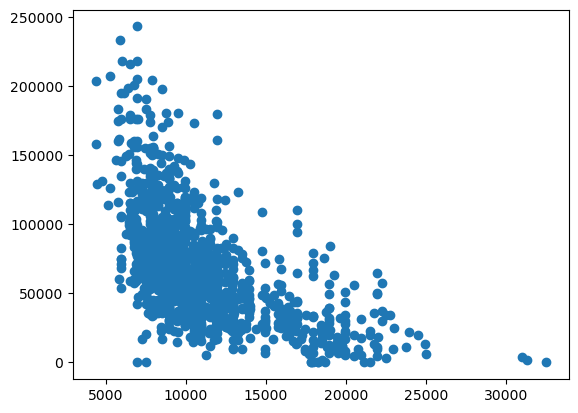

In [125]:
plt.scatter(df.Price, df.KM)

In [126]:
sse=((y_test-y_pred)**2).sum()

In [127]:
sse

Price    4.496132e+10
dtype: float64

In [133]:
sst=((y_test-y_test.mean()**2)).sum()

In [134]:
sst

Price   -4.065403e+10
dtype: float64

In [135]:
Rsquared=1-(sse/sst)

In [136]:
Rsquared

Price    2.10595
dtype: float64

In [139]:
from sklearn.linear_model import Ridge


In [142]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso


In [148]:
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train,y_train)
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 1.0
The test score for ridge model is 1.0


In [149]:
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.9999999999994001
The test score for ls model is 0.9999999999994014
